In [21]:
import sys, os, inspect, logging, importlib

import geopandas as gpd
import pandas as pd
import numpy as np
import osmnx as ox
import networkx as nx

import matplotlib.pyplot as plt

In [22]:
# Get reference to GOSTNets
sys.path.append(r'../../GOSTNets/GOSTNets')
import GOSTnet as gn

In [23]:
# Define input data and create a number of output datasets if they do not yet exist
inputFolder = r'./input_folder'

input_edges = pd.read_csv(os.path.join(inputFolder, "edges.csv"))

In [24]:
input_edges

,source,target,link_id,length,time
0,38,69,1,1304,28.977778
1,38,70,2,174,3.866667
2,36,70,3,259,10.360000
3,5,36,4,45,1.800000
4,24,5,5,77,2.200000
...,...,...,...,...,...
99,36,49,104,22,0.880000
100,50,25,105,113,4.520000
101,33,79,106,460,46.000000
102,79,80,107,257,25.700000


In [25]:
value_of_time_per_ton_in_usd = .102704

In [26]:
input_edges['cost'] = input_edges['time'] * value_of_time_per_ton_in_usd

In [27]:
input_edges

,source,target,link_id,length,time,cost
0,38,69,1,1304,28.977778,2.976134
1,38,70,2,174,3.866667,0.397122
2,36,70,3,259,10.360000,1.064013
3,5,36,4,45,1.800000,0.184867
4,24,5,5,77,2.200000,0.225949
...,...,...,...,...,...,...
99,36,49,104,22,0.880000,0.090380
100,50,25,105,113,4.520000,0.464222
101,33,79,106,460,46.000000,4.724384
102,79,80,107,257,25.700000,2.639493


In [28]:
G = nx.from_pandas_edgelist(input_edges, edge_attr = 'cost')

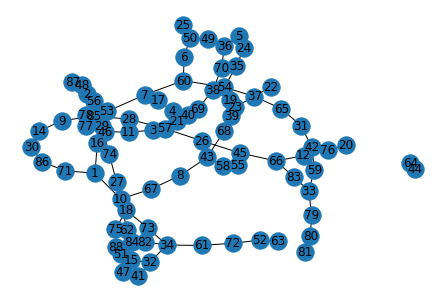

In [29]:
nx.draw(G, with_labels = True)

In [30]:
type(G)

networkx.classes.graph.Graph

## Add border nodes

In [31]:
input_nodes = pd.read_csv(os.path.join(inputFolder, "nodes.csv"))

In [32]:
input_nodes

,node_id,name,border,gauge_change
0,1,Aktau,False,False
1,2,Aktobe,False,False
2,3,Aktogal,False,False
3,4,Almaty,False,False
4,5,Andijan,True,False
...,...,...,...,...
83,84,Rustawi,True,False
84,85,Godurulum,True,True
85,86,No Name,False,False
86,87,Yaysan,True,False


## We are using a simpler method compared to ver 1. We are not creating any intermediate nodes, we are just adding the 1/2 the border costs to each adjacent edge to a border node.

In [34]:
# border costs
# each border crossing has a time of 4 hours and a cost of $20 per ton
add_border_costs_per_link = (4 * value_of_time_per_ton_in_usd + 20) / 2
# each gauge change has a time of 12 hours and a cost of $10 per ton
add_border_w_gauge_costs_per_link = (12 * value_of_time_per_ton_in_usd + 10) / 2

In [36]:
# loop through input nodes
for index, row in input_nodes.iterrows():
    # if border node with gauge change
    if row[3]:
        for entry in list(G.neighbors(row[0])):
                #print('edge')
                #print(entry)
                G.edges[entry,row[0]]['cost'] = G.edges[entry,row[0]]['cost'] + add_border_w_gauge_costs_per_link
    # else if reg border node
    elif row[2]:
        #print(row[0],row[1])
        for entry in list(G.neighbors(row[0])):
            #print('edge')
            #print(entry)
            G.edges[entry,row[0]]['cost'] = G.edges[entry,row[0]]['cost'] + add_border_costs_per_link

In [38]:
G.edges[5,36]

{'cost': 10.3902752}

In [39]:
G.edges[5,36]['cost'] = 2.9

In [40]:
G.edges[5,36]

{'cost': 2.9}

In [41]:
#G.edges[37,65]

In [42]:
for e in G.edges(data = True):
    # For each edge's attribute
    print(e)

(38, 69, {'cost': 2.97613368911712})
(38, 70, {'cost': 6.013346133367568})
(69, 40, {'cost': 1.8053080891171203})
(69, 21, {'cost': 7.04495075544144})
(70, 36, {'cost': 6.68023744})
(36, 5, {'cost': 2.9})
(36, 49, {'cost': 0.09037952})
(5, 24, {'cost': 20.6367648})
(24, 35, {'cost': 11.25005439985328})
(35, 54, {'cost': 0.2670304})
(54, 37, {'cost': 0.440160000029344})
(54, 23, {'cost': 0.9859584})
(54, 60, {'cost': 11.085727999955985})
(54, 19, {'cost': 0.730665599970656})
(37, 65, {'cost': 0.8245664000440159})
(37, 23, {'cost': 0.754140800014672})
(37, 22, {'cost': 0.848041599985328})
(65, 31, {'cost': 10.282436})
(31, 42, {'cost': 10.975688})
(23, 68, {'cost': 10.269964800044017})
(68, 43, {'cost': 10.918467200014673})
(68, 39, {'cost': 20.475372800044017})
(43, 58, {'cost': 0.223014399955984})
(43, 8, {'cost': 1.12387519970656})
(58, 55, {'cost': 5.9654176})
(55, 55, {'cost': 5.630896000014672})
(55, 45, {'cost': 6.1348792})
(45, 66, {'cost': 0.26446280000000005})
(45, 26, {'cost':

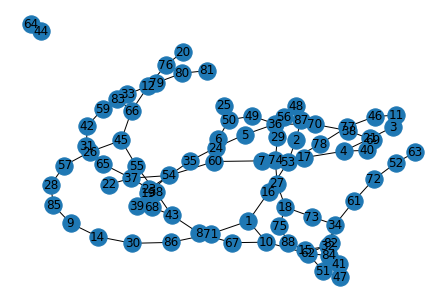

In [43]:
nx.draw(G, with_labels = True)

In [ ]:
originNodes = list(snapped_origins['NN'].unique())